**Análisis de historiales agricolas para predicción, agrupación y clasificación de cultivos**

En esta presentación encontrarás metodos de Machine Learning para manejar una base de datos experimental de diferentes cultivos. Para ello nos enfocamos en 2 metodos en particular para estas pruebas, uno de Regresion y otro de Clustering.

Importacion de las primeras librerias para el manejo de los datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Leemos nuestra base de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/X Curso Samsung/crop_yield.csv', header='infer')

Observamos la cantidad de filas y columnas a tratar

In [ ]:
df.shape

(1000000, 10)

Número de dimensiones

In [ ]:
df.ndim

2

Nombre de cada columna

In [ ]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

Información general de la base de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


Vemos una breve descripcién de los datps numéricos

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,1000000.0,549.981901,259.851320,100.000896,324.891090,550.124061,774.738520,999.998098
Temperature_Celsius,1000000.0,27.504965,7.220608,15.000034,21.254502,27.507365,33.753267,39.999997
Days_to_Harvest,1000000.0,104.495025,25.953412,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,1000000.0,4.649472,1.696572,-1.147613,3.417637,4.651808,5.879200,9.963372


Mostramos los 10 primeros datos para darnos una idea de como vienen los datos

In [ ]:
df.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


Vemos la relacion de diferentes valores que elegimos en relación al tipo de cultivo

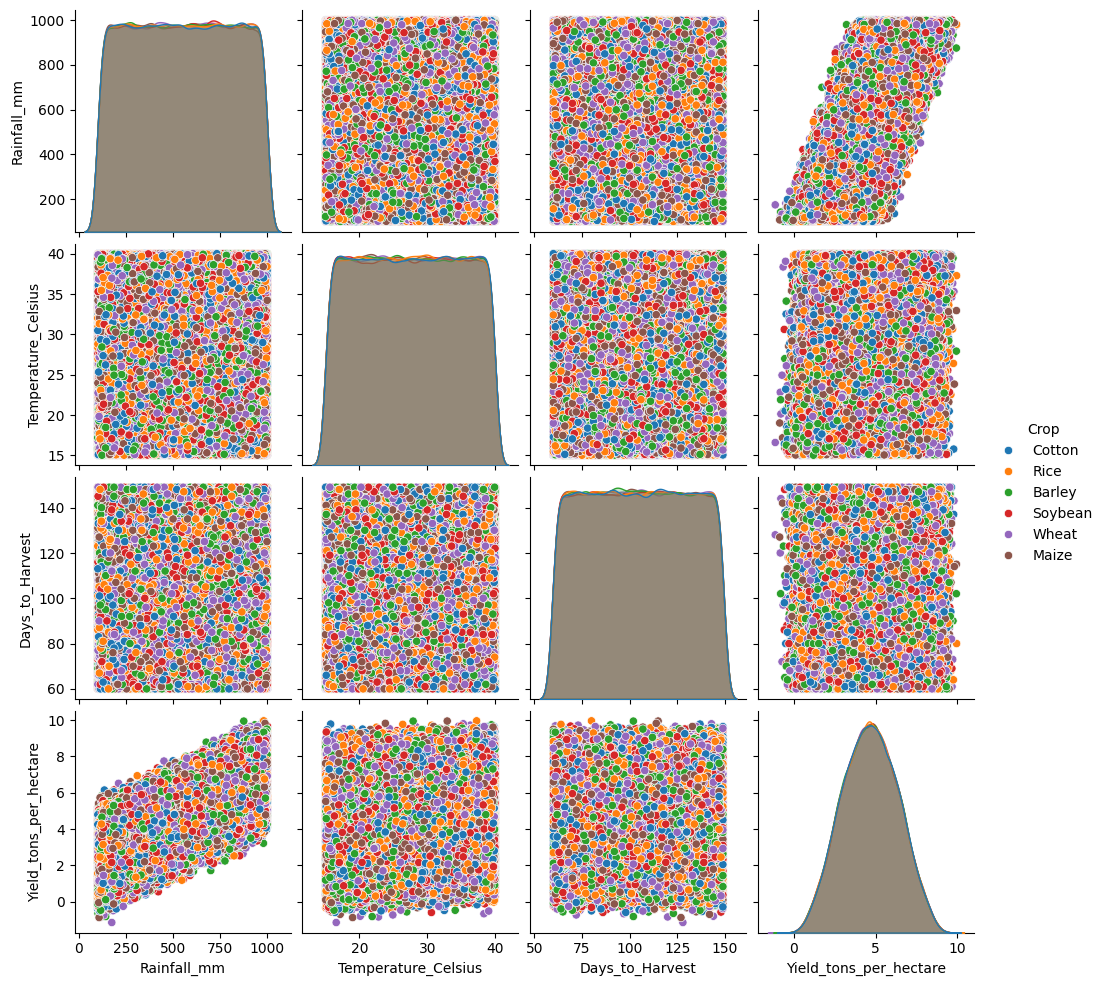

In [ ]:
sns.pairplot(df, hue="Crop", vars=["Rainfall_mm", "Temperature_Celsius",	"Days_to_Harvest",	"Yield_tons_per_hectare"])
plt.show()

Nos enfocamos en solo un dato que observamos que era el que tenia mejor linealidad

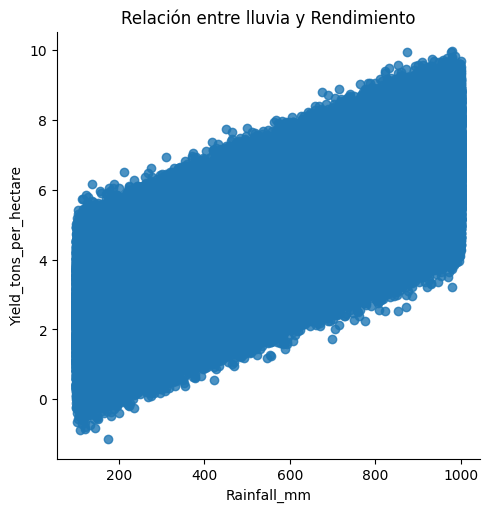

In [ ]:
sns.lmplot(x="Rainfall_mm", y="Yield_tons_per_hectare", data=df)
plt.title("Relación entre lluvia y Rendimiento de toneladas")
plt.show()

Este mapa de calor nos muestra la correlacion entre todos nuestros datos numericos

<Axes: >

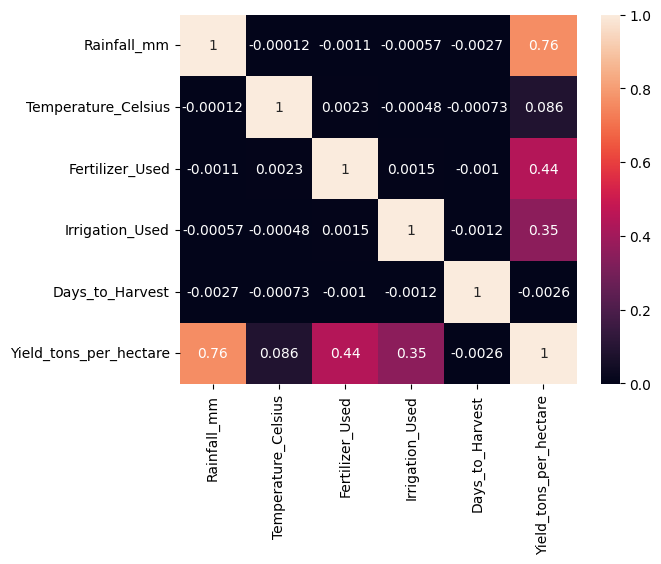

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

Con esta gráfica notamos que obtenemos mejor producción si es que aplicamos riego

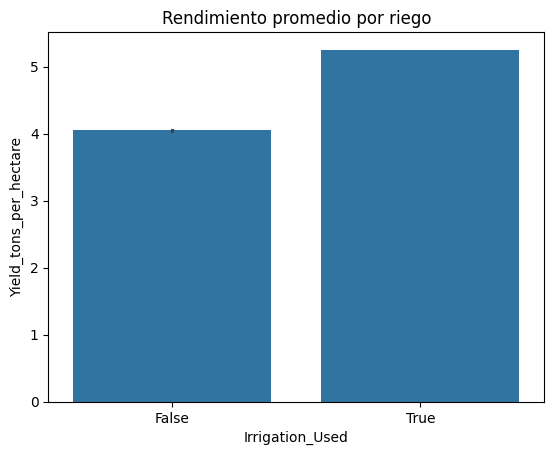

In [ ]:
sns.barplot(x="Irrigation_Used", y="Yield_tons_per_hectare", data=df)
plt.title("Rendimiento promedio por riego")
plt.show()

Pasa algo similar que la anterior grafica ya que obtenemos mejor producción si es que aplicamos fertilizante

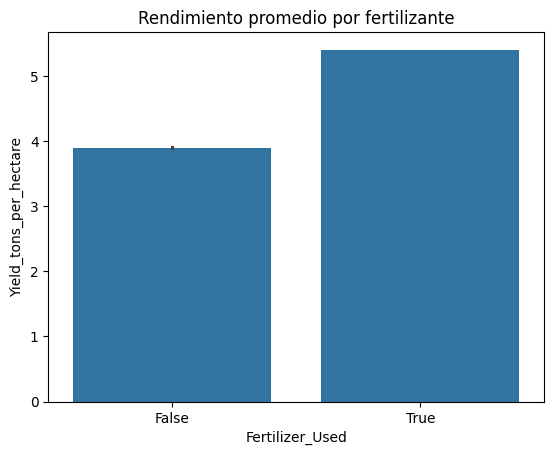

In [ ]:
sns.barplot(x="Fertilizer_Used", y="Yield_tons_per_hectare", data=df)
plt.title("Rendimiento promedio por fertilizante")
plt.show()

**Random Forest**

Importamos las librerias necesarias

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Buscamos correlaciones dentro del dataset

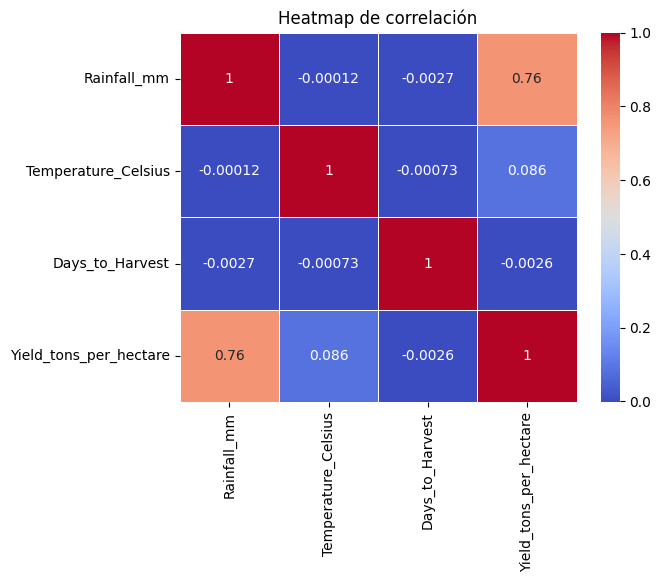

In [ ]:
df_floats = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(df_floats.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap de correlación")
plt.show()

Vemos la distribucion de los datos dentro del dataset

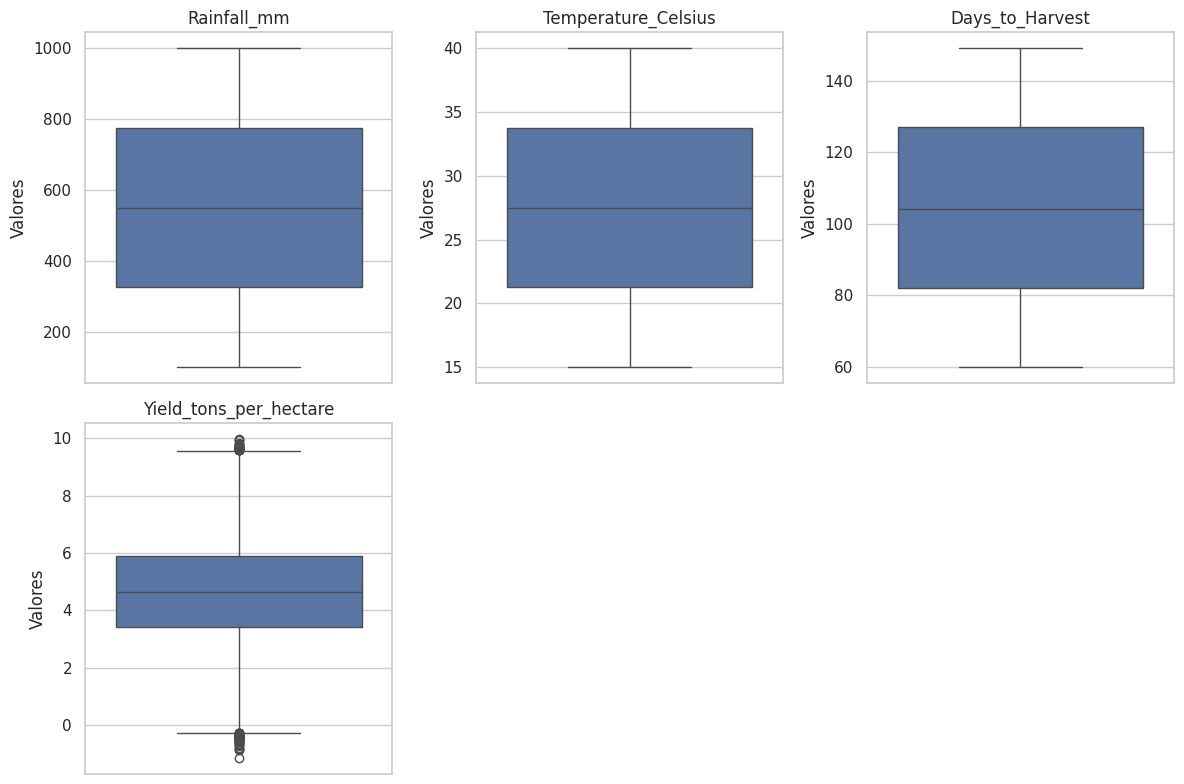

In [ ]:
# Seleccionar solo las columnas de tipo float64 e int64
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un BoxPlot para cada columna numérica
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Ajustar el layout según el número de columnas
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.ylabel('Valores')

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

Entrenamos un modelo de random forest para poder clasificar si se uso fertilizante o no en un cultivo

In [ ]:
#Escogemos los datos del dataset para poder trabajar
y = df["Fertilizer_Used"]
X = df_floats

#Dividimos losa datos para poder entrenar y probar al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Creamos el modelo de arndomforest con hiperparametros especificos
model = RandomForestClassifier(
    n_estimators=5,    # Número de árboles
    max_depth=10,      # Profundidad máxima de cada árbol
    random_state=42    # Semilla del modelo
)
model.fit(X_train, y_train)

#Hacemos una prediccion con el modelo ya entrenado
y_pred = model.predict(X_test)

Evaluamos el rendimiento del proyecto segun los resultados

Precisión: 0.81


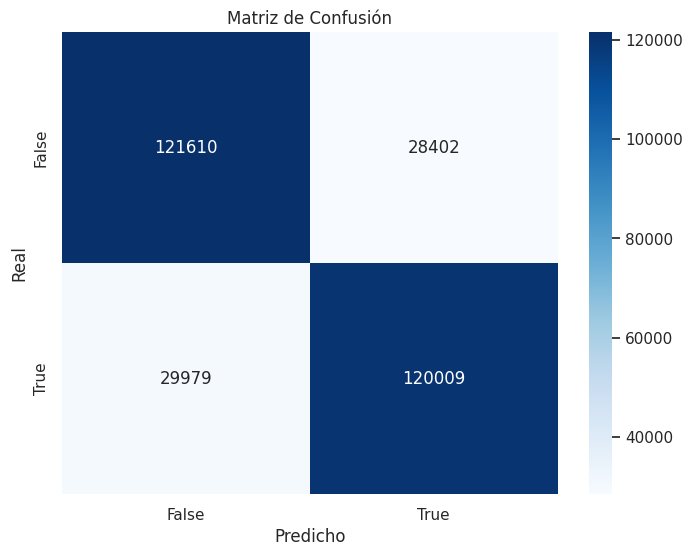

              precision    recall  f1-score   support

       False       0.80      0.81      0.81    150012
        True       0.81      0.80      0.80    149988

    accuracy                           0.81    300000
   macro avg       0.81      0.81      0.81    300000
weighted avg       0.81      0.81      0.81    300000



In [ ]:
#Calculamos la presicion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")

# MOstramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

**Regresion Lineal Simple**

Empezamos por llamar otra vez a nuestra base de datos con otro nombre pero ahora solo usando solo 2 de los datos

In [ ]:
data_file=pd.read_csv('/content/drive/MyDrive/X Curso Samsung/crop_yield.csv',usecols=[3,9], encoding='latin-1')
data_file

,Rainfall_mm,Yield_tons_per_hectare
0,897.077239,6.555816
1,992.673282,8.527341
2,147.998025,1.127443
3,986.866331,6.517573
4,730.379174,7.248251
...,...,...
999995,302.805345,1.347586
999996,932.991383,7.311594
999997,867.362046,5.763182
999998,492.812857,2.070159


Observamos que tenemos una muy buena correlación entre estos datos

<Axes: >

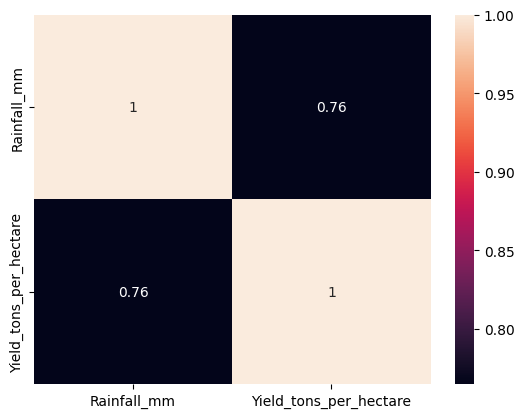

In [ ]:
sns.heatmap(data_file.corr(numeric_only=True),annot = True)

Graficamos nuestros datos

<ipython-input-17-64970c8889e2>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


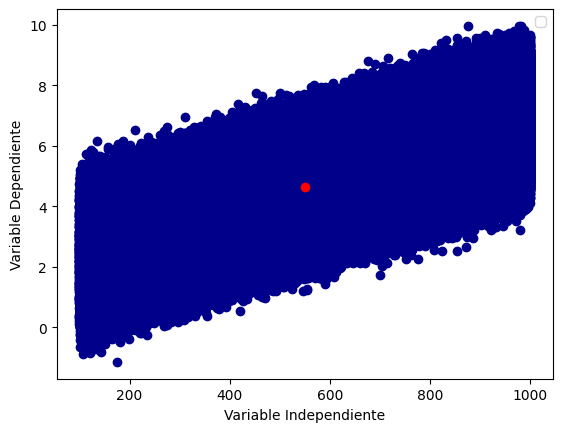

In [ ]:
plt.scatter(data_file['Rainfall_mm'],data_file['Yield_tons_per_hectare'],c='DarkBlue')
mean_data = data_file.mean(0)
plt.scatter(mean_data['Rainfall_mm'],mean_data['Yield_tons_per_hectare'],c='Red')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

Aplicamos una Regresión Lineal con ambos datos

In [ ]:
from sklearn.linear_model import LinearRegression
# Crear un modelo de regresión lineal
modelo = LinearRegression()

X = data_file['Rainfall_mm'].values.reshape(-1, 1) # Variable independiente
Y = data_file['Yield_tons_per_hectare']#.values.reshape(-1, 1) # Variable dependependiente
# Ajustar el modelo a los datos
modelo.fit(X,Y)

LinearRegression()

Hacemos predicciones con este modelo

In [ ]:
# Hacer predicciones
y_pred = modelo.predict(X)

Graficamos la regresión lineal resultante

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


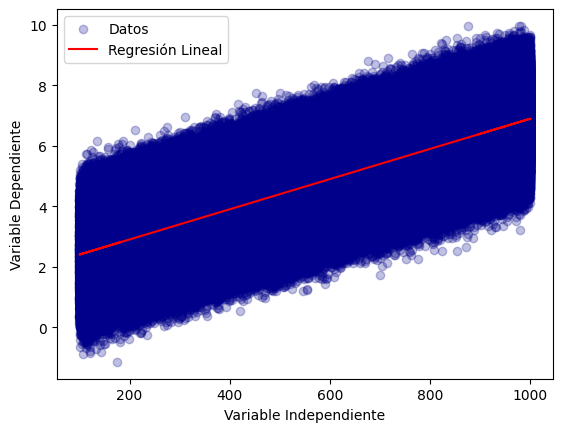

In [ ]:
# Graficar los datos y la regresión lineal
plt.scatter(X, Y, label='Datos',color='DarkBlue', alpha=0.25)
plt.plot(X, y_pred, color='red', label='Regresión Lineal')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()

Vemos cual es nuestra pendiente

In [ ]:
#pendiente
modelo.coef_

array([0.0049922])

Imprimimos el intercepto

In [ ]:
#intercepto
modelo.intercept_

np.float64(1.9038528338755092)

Con esto vemos nuestro error cuadratico medio

In [ ]:
from sklearn.metrics import mean_squared_error
error_cuadratico_medio = mean_squared_error(Y,y_pred)
error_cuadratico_medio

1.1955518222779753

Obtenemos la raíz cuadrada de nuestro MSE

In [ ]:
rmse = np.sqrt(error_cuadratico_medio)
print(f"RMSE: {rmse:.4f}")

RMSE: 1.0934


Aquí lo que hacemos es medir la proporción de la varianza de nuestra variable dependiente

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.5846


**Regresion Lineal Multiple**

Llamamos otra vez a nuestra base de datos pero ahora usando 4 de los datos

In [ ]:
data_file=pd.read_csv('/content/drive/MyDrive/X Curso Samsung/crop_yield.csv',usecols=[3,5,6,9], encoding='latin-1')
data_file

,Rainfall_mm,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,897.077239,False,True,6.555816
1,992.673282,True,True,8.527341
2,147.998025,False,False,1.127443
3,986.866331,False,True,6.517573
4,730.379174,True,True,7.248251
...,...,...,...,...
999995,302.805345,False,False,1.347586
999996,932.991383,True,False,7.311594
999997,867.362046,True,False,5.763182
999998,492.812857,False,False,2.070159


Vemos la correlación de estas 4 variables

<Axes: >

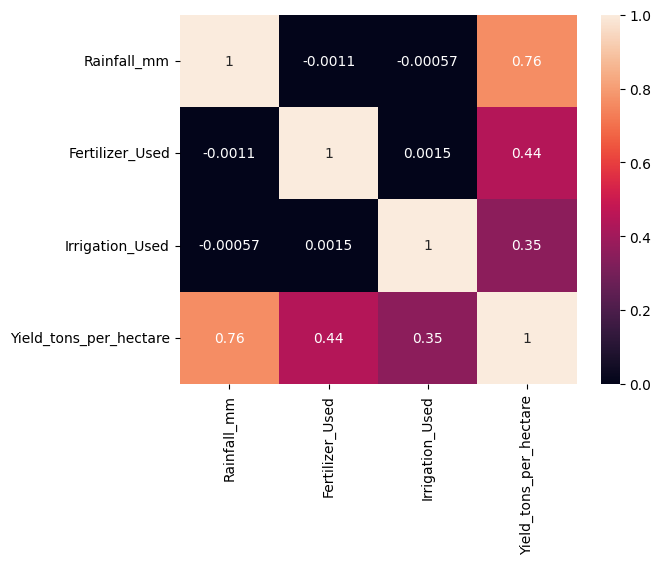

In [ ]:
sns.heatmap(data_file.corr(numeric_only=True),annot = True)

Mandamos a llamar otras librerías que serán de utilidad

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

Graficamos tanto la evolución del MSE durante el entrenamiento y prueba junto con la gráfica de la regresión lineal múltiple pero solo usando 2 de las variables independientes. Tambien sacamos los valores de MSE durante entrenamiento y prueba, la validación cruzada y la varianza.

MSE en validación cruzada (con librerias de python): 0.219344031861249
MSE promedio en validación K-Fold (con gradiente descendente): 0.2193439268412026


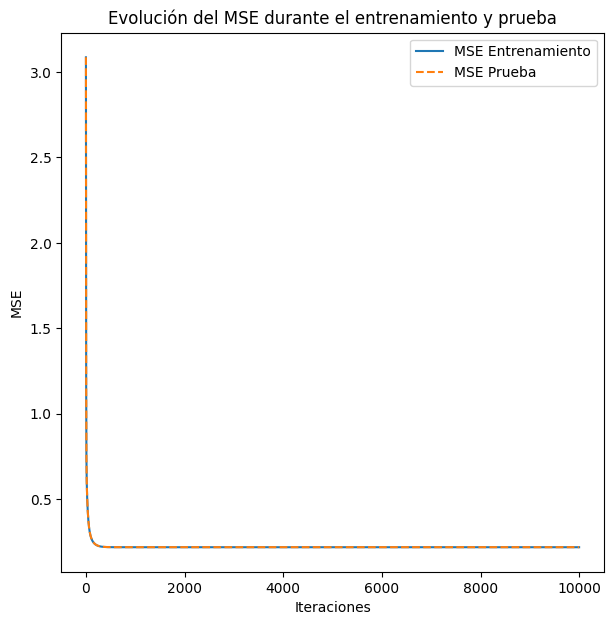

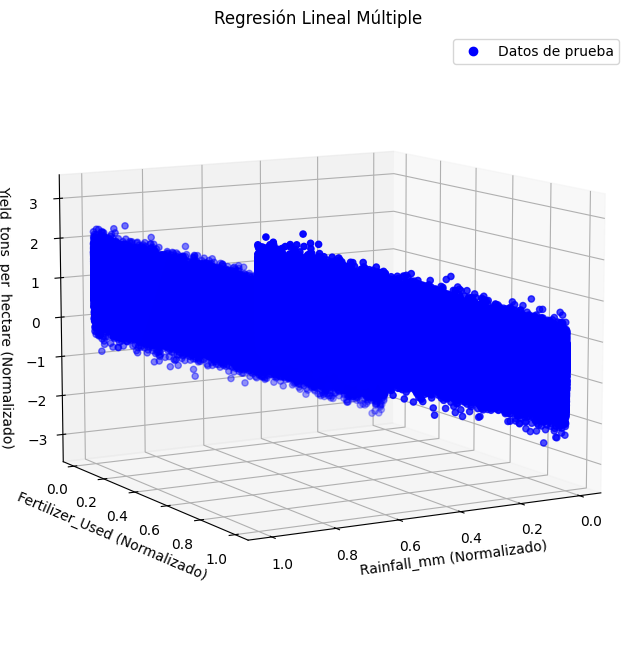

Error Cuadrático Medio en Entrenamiento: 0.21924304945705497
Error Cuadrático Medio en Prueba: 0.21949388571556935
MSE en validación cruzada: 0.219344031861249
Varianza de y_test: 1.0018663189947195
MSE en Prueba: 0.21949388571556935


In [ ]:
# Seleccionar las variables
X = data_file[['Rainfall_mm', 'Fertilizer_Used']].values  # Variables independientes
y = data_file['Yield_tons_per_hectare'].values  # Variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalización de X
scaler_X = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalización de Y
scaler_y = StandardScaler()
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Definir la clase para la regresión lineal múltiple con descenso de gradiente
class RegresionLinealMultiple:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef_ = None
        self.intercept_ = None
        self.train_errors = []  # Guardar MSE en entrenamiento
        self.test_errors = []   # Guardar MSE en prueba

    def fit(self, X, y, X_val, y_val):
        X_con_intercepto = np.column_stack((np.ones(len(X)), X))
        X_val_con_intercepto = np.column_stack((np.ones(len(X_val)), X_val))

        self.coef_ = np.random.randn(X_con_intercepto.shape[1])
        m = len(y)

        for _ in range(self.n_iter):
            gradient = (-2/m) * X_con_intercepto.T @ (y - X_con_intercepto @ self.coef_)
            self.coef_ -= self.learning_rate * gradient

            # Calcular y guardar los errores en cada iteración
            y_pred_train = X_con_intercepto @ self.coef_
            y_pred_test = X_val_con_intercepto @ self.coef_

            mse_train = np.mean((y - y_pred_train) ** 2)
            mse_test = np.mean((y_val - y_pred_test) ** 2)

            self.train_errors.append(mse_train)
            self.test_errors.append(mse_test)

        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        X_con_intercepto = np.column_stack((np.ones(len(X)), X))
        return X_con_intercepto @ np.concatenate(([self.intercept_], self.coef_))

# Crear el modelo y entrenarlo
#------------------------------------------------------------------
#modelo = RegresionLinealMultiple(learning_rate=0.01, n_iter=20000)
#------------------------------------------------------------------
modelo = RegresionLinealMultiple(learning_rate=0.05, n_iter=10000)
#------------------------------------------------------------------
#modelo = RegresionLinealMultiple(learning_rate=0.005, n_iter=20000)
modelo.fit(X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized)

# Evaluación del modelo
predicciones = modelo.predict(X_test_normalized)
MSE_train = np.mean((y_train_normalized - modelo.predict(X_train_normalized)) ** 2)
MSE_test = np.mean((y_test_normalized - predicciones) ** 2)

# Validación cruzada para regresión lineal con librerías de Python
modelo_cv = LinearRegression()
scores = cross_val_score(modelo_cv, scaler_X.transform(X), scaler_y.transform(y.reshape(-1, 1)).flatten(), cv=5, scoring='neg_mean_squared_error')
print(f"MSE en validación cruzada (con librerias de python): {-scores.mean()}")

# Validación cruzada K-Fold para regresión con gradiente descendente
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_kfold = []

for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    X_train_k = scaler_X.transform(X_train_k)
    X_test_k = scaler_X.transform(X_test_k)
    y_train_k = scaler_y.transform(y_train_k.reshape(-1, 1)).flatten()
    y_test_k = scaler_y.transform(y_test_k.reshape(-1, 1)).flatten()

    modelo_kfold = RegresionLinealMultiple(learning_rate=0.05, n_iter=10000)
    modelo_kfold.fit(X_train_k, y_train_k, X_test_k, y_test_k)

    y_pred_k = modelo_kfold.predict(X_test_k)
    mse_kfold.append(mean_squared_error(y_test_k, y_pred_k))

print(f"MSE promedio en validación K-Fold (con gradiente descendente): {np.mean(mse_kfold)}")

# Graficar la evolución del MSE
fig = plt.figure(figsize=(7, 7))
plt.plot(range(len(modelo.train_errors)), modelo.train_errors, label="MSE Entrenamiento")
plt.plot(range(len(modelo.test_errors)), modelo.test_errors, label="MSE Prueba", linestyle="dashed")
plt.xlabel("Iteraciones", fontsize=10)
plt.ylabel("MSE", fontsize=10)
plt.title("Evolución del MSE durante el entrenamiento y prueba")
plt.legend()
plt.show()

# Graficar los datos y el hiperplano resultante
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test_normalized[:,0], X_test_normalized[:,1], y_test_normalized, c='b', marker='o')

# Crear una cuadrícula de valores para la superficie
xx, yy = np.meshgrid(np.linspace(X_test_normalized[:,0].min(), X_test_normalized[:,0].max(), 30),
                     np.linspace(X_test_normalized[:,1].min(), X_test_normalized[:,1].max(), 30))
zz = modelo.intercept_ + modelo.coef_[0] * xx + modelo.coef_[1] * yy

# Graficar la superficie del modelo
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5, label="Modelo de regresión")

# Etiquetas de los ejes
ax.set_xlabel('Rainfall_mm (Normalizado)', fontsize=10)
ax.set_ylabel('Fertilizer_Used (Normalizado)', fontsize=10)
ax.set_zlabel('Yield_tons_per_hectare (Normalizado)', fontsize=10)
plt.title("Regresión Lineal Múltiple", fontsize=12)

ax.view_init(elev=10, azim=60)
scatter_proxy = plt.Line2D([0], [0], linestyle="none", c='b', marker='o', label="Datos de prueba")
ax.legend(handles=[scatter_proxy])
# Mostrar la gráfica
plt.show()

print(f"Error Cuadrático Medio en Entrenamiento: {MSE_train}")
print(f"Error Cuadrático Medio en Prueba: {MSE_test}")

# Validación cruzada con normalización aplicada
X_scaled = scaler_X.transform(X)  # Normalizamos X antes de la validación cruzada
y_scaled = scaler_y.transform(y.reshape(-1, 1)).flatten()
modelo_cv = LinearRegression()
scores = cross_val_score(modelo_cv, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"MSE en validación cruzada: {-scores.mean()}")

# Calcular varianza de y_test
varianza_y = np.var(y_test_normalized)
print(f"Varianza de y_test: {varianza_y}")

Ahora si graficamos tanto la evolución del MSE durante el entrenamiento y prueba junto con la gráfica de la regresión lineal múltiple pero ahora usando 3 variables independientes. Tambien sacamos los valores de MSE durante entrenamiento y prueba, la validación cruzada y la varianza.

MSE en validación cruzada (con librerias de python): 0.09428377156119967
MSE promedio en validación K-Fold (con gradiente descendente): 0.0942833633332352


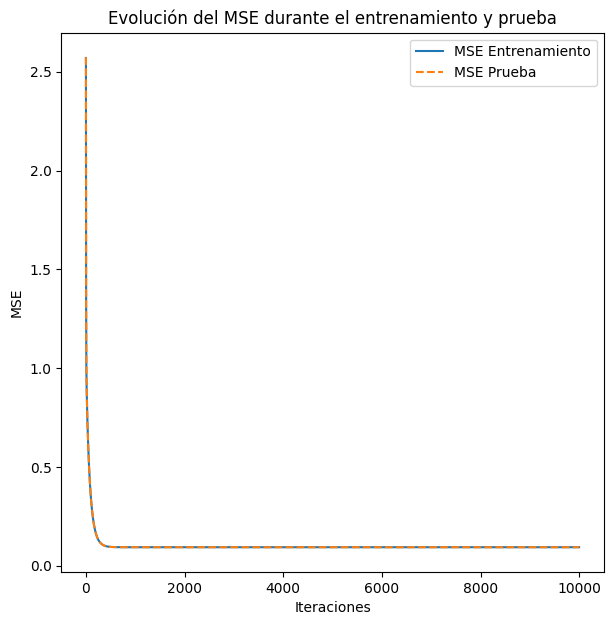

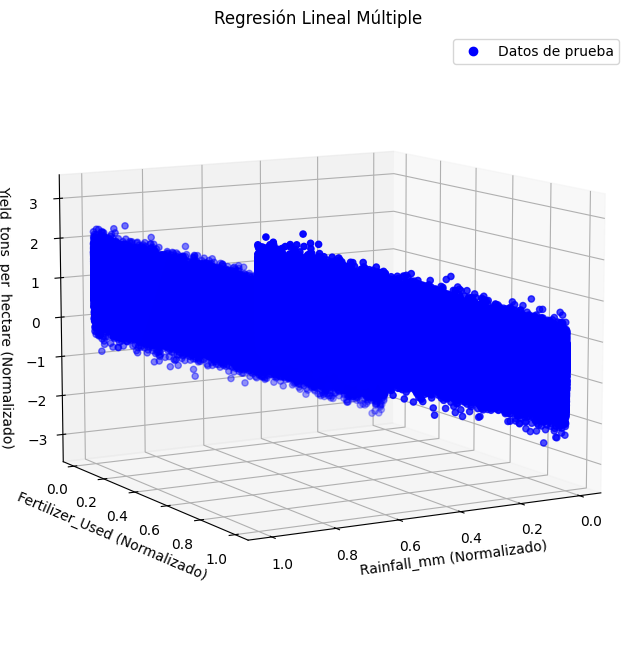

Error Cuadrático Medio en Entrenamiento: 0.0942837515188684
Error Cuadrático Medio en Prueba: 0.0942809849838619
MSE en validación cruzada: 0.09428377156119967
Varianza de y_test: 1.0018663189947195
MSE en Prueba: 0.0942809849838619


In [ ]:
# Seleccionar las variables
X = data_file[['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used']].values  # Variables independientes
y = data_file['Yield_tons_per_hectare'].values  # Variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalización de X
scaler_X = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalización de Y
scaler_y = StandardScaler()
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Definir la clase para la regresión lineal múltiple con descenso de gradiente
class RegresionLinealMultiple:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef_ = None
        self.intercept_ = None
        self.train_errors = []  # Guardar MSE en entrenamiento
        self.test_errors = []   # Guardar MSE en prueba

    def fit(self, X, y, X_val, y_val):
        X_con_intercepto = np.column_stack((np.ones(len(X)), X))
        X_val_con_intercepto = np.column_stack((np.ones(len(X_val)), X_val))

        self.coef_ = np.random.randn(X_con_intercepto.shape[1])
        m = len(y)

        for _ in range(self.n_iter):
            gradient = (-2/m) * X_con_intercepto.T @ (y - X_con_intercepto @ self.coef_)
            self.coef_ -= self.learning_rate * gradient

            # Calcular y guardar los errores en cada iteración
            y_pred_train = X_con_intercepto @ self.coef_
            y_pred_test = X_val_con_intercepto @ self.coef_

            mse_train = np.mean((y - y_pred_train) ** 2)
            mse_test = np.mean((y_val - y_pred_test) ** 2)

            self.train_errors.append(mse_train)
            self.test_errors.append(mse_test)

        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        X_con_intercepto = np.column_stack((np.ones(len(X)), X))
        return X_con_intercepto @ np.concatenate(([self.intercept_], self.coef_))

# Crear el modelo y entrenarlo
#------------------------------------------------------------------
#modelo = RegresionLinealMultiple(learning_rate=0.01, n_iter=20000)
#------------------------------------------------------------------
modelo = RegresionLinealMultiple(learning_rate=0.05, n_iter=10000)
#------------------------------------------------------------------
#modelo = RegresionLinealMultiple(learning_rate=0.005, n_iter=20000)
modelo.fit(X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized)

# Evaluación del modelo
predicciones = modelo.predict(X_test_normalized)
MSE_train = np.mean((y_train_normalized - modelo.predict(X_train_normalized)) ** 2)
MSE_test = np.mean((y_test_normalized - predicciones) ** 2)

# Validación cruzada para regresión lineal con librerías de Python
modelo_cv = LinearRegression()
scores = cross_val_score(modelo_cv, scaler_X.transform(X), scaler_y.transform(y.reshape(-1, 1)).flatten(), cv=5, scoring='neg_mean_squared_error')
print(f"MSE en validación cruzada (con librerias de python): {-scores.mean()}")

# Validación cruzada K-Fold para regresión con gradiente descendente
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_kfold = []

for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    X_train_k = scaler_X.transform(X_train_k)
    X_test_k = scaler_X.transform(X_test_k)
    y_train_k = scaler_y.transform(y_train_k.reshape(-1, 1)).flatten()
    y_test_k = scaler_y.transform(y_test_k.reshape(-1, 1)).flatten()

    modelo_kfold = RegresionLinealMultiple(learning_rate=0.05, n_iter=10000)
    modelo_kfold.fit(X_train_k, y_train_k, X_test_k, y_test_k)

    y_pred_k = modelo_kfold.predict(X_test_k)
    mse_kfold.append(mean_squared_error(y_test_k, y_pred_k))

print(f"MSE promedio en validación K-Fold (con gradiente descendente): {np.mean(mse_kfold)}")

# Graficar la evolución del MSE
fig = plt.figure(figsize=(7, 7))
plt.plot(range(len(modelo.train_errors)), modelo.train_errors, label="MSE Entrenamiento")
plt.plot(range(len(modelo.test_errors)), modelo.test_errors, label="MSE Prueba", linestyle="dashed")
plt.xlabel("Iteraciones", fontsize=10)
plt.ylabel("MSE", fontsize=10)
plt.title("Evolución del MSE durante el entrenamiento y prueba")
plt.legend()
plt.show()

# Graficar los datos y el hiperplano resultante
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test_normalized[:,0], X_test_normalized[:,1], y_test_normalized, c='b', marker='o')

# Crear una cuadrícula de valores para la superficie
xx, yy = np.meshgrid(np.linspace(X_test_normalized[:,0].min(), X_test_normalized[:,0].max(), 30),
                     np.linspace(X_test_normalized[:,1].min(), X_test_normalized[:,1].max(), 30))
zz = modelo.intercept_ + modelo.coef_[0] * xx + modelo.coef_[1] * yy

# Graficar la superficie del modelo
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5, label="Modelo de regresión")

# Etiquetas de los ejes
ax.set_xlabel('Rainfall_mm (Normalizado)', fontsize=10)
ax.set_ylabel('Fertilizer_Used (Normalizado)', fontsize=10)
ax.set_zlabel('Yield_tons_per_hectare (Normalizado)', fontsize=10)
plt.title("Regresión Lineal Múltiple", fontsize=12)

ax.view_init(elev=10, azim=60)
scatter_proxy = plt.Line2D([0], [0], linestyle="none", c='b', marker='o', label="Datos de prueba")
ax.legend(handles=[scatter_proxy])
# Mostrar la gráfica
plt.show()

print(f"Error Cuadrático Medio en Entrenamiento: {MSE_train}")
print(f"Error Cuadrático Medio en Prueba: {MSE_test}")

# Validación cruzada con normalización aplicada
X_scaled = scaler_X.transform(X)  # Normalizamos X antes de la validación cruzada
y_scaled = scaler_y.transform(y.reshape(-1, 1)).flatten()
modelo_cv = LinearRegression()
scores = cross_val_score(modelo_cv, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"MSE en validación cruzada: {-scores.mean()}")

# Calcular varianza de y_test
varianza_y = np.var(y_test_normalized)
print(f"Varianza de y_test: {varianza_y}")

Graficamos la regresión lineal múltiple similar a la anterior, pero con la diferencia de que esta se logra diferenciar de mejor manera cuando si usamos el riego y cuando no, además de que los colores son mas llamativos.

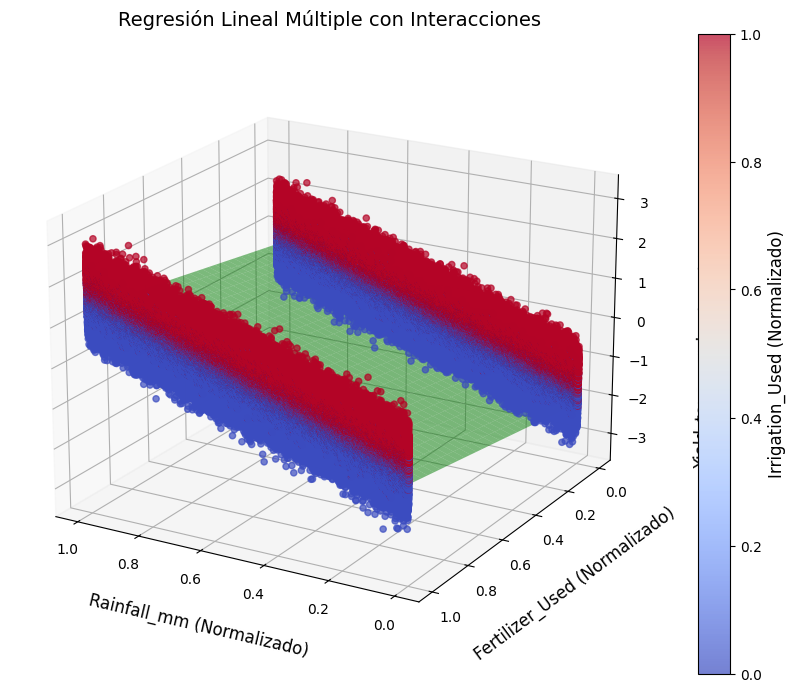

Error Cuadrático Medio en Entrenamiento: 0.0942837515188684
Error Cuadrático Medio en Prueba: 0.0942809849838619


In [ ]:
# Seleccionar las variables
X = data_file[['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used']].values  # Variables independientes
y = data_file['Yield_tons_per_hectare'].values  # Variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalización de X
scaler_X = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalización de Y
scaler_y = StandardScaler()
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Definir la clase para la regresión lineal múltiple con descenso de gradiente
class RegresionLinealMultiple:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef_ = None
        self.intercept_ = None
        self.train_errors = []
        self.test_errors = []

    def fit(self, X, y, X_val, y_val):
        X_con_intercepto = np.column_stack((np.ones(len(X)), X))
        X_val_con_intercepto = np.column_stack((np.ones(len(X_val)), X_val))

        self.coef_ = np.random.randn(X_con_intercepto.shape[1])
        m = len(y)

        for _ in range(self.n_iter):
            gradient = (-2/m) * X_con_intercepto.T @ (y - X_con_intercepto @ self.coef_)
            self.coef_ -= self.learning_rate * gradient

            y_pred_train = X_con_intercepto @ self.coef_
            y_pred_test = X_val_con_intercepto @ self.coef_

            mse_train = np.mean((y - y_pred_train) ** 2)
            mse_test = np.mean((y_val - y_pred_test) ** 2)

            self.train_errors.append(mse_train)
            self.test_errors.append(mse_test)

        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        X_con_intercepto = np.column_stack((np.ones(len(X)), X))
        return X_con_intercepto @ np.concatenate(([self.intercept_], self.coef_))

# Entrenar modelo
modelo = RegresionLinealMultiple(learning_rate=0.05, n_iter=10000)
modelo.fit(X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized)

# Evaluación del modelo
predicciones = modelo.predict(X_test_normalized)
MSE_train = np.mean((y_train_normalized - modelo.predict(X_train_normalized)) ** 2)
MSE_test = np.mean((y_test_normalized - predicciones) ** 2)

# Graficar los datos y el hiperplano resultante con ajustes de tamaño
fig = plt.figure(figsize=(12, 8))  # Aumentar tamaño de la figura
ax = fig.add_subplot(projection='3d')

# Usar "Irrigation_Used" para definir el color
sc = ax.scatter(X_test_normalized[:, 0],  # Rainfall_mm (Normalizado)
                X_test_normalized[:, 1],  # Fertilizer_Used (Normalizado)
                y_test_normalized,        # Yield_tons_per_hectare (Normalizado)
                c=X_test_normalized[:, 2],  # Irrigation_Used (Normalizado)
                cmap='coolwarm', alpha=0.7)

# Crear una cuadrícula para la superficie del modelo
xx, yy = np.meshgrid(np.linspace(X_test_normalized[:, 0].min(), X_test_normalized[:, 0].max(), 30),
                     np.linspace(X_test_normalized[:, 1].min(), X_test_normalized[:, 1].max(), 30))

zz = modelo.intercept_ + modelo.coef_[0] * xx + modelo.coef_[1] * yy

# Graficar la superficie del modelo
ax.plot_surface(xx, yy, zz, color='g', alpha=0.5)

# Ajustar el ángulo de visión para mejorar la legibilidad
ax.view_init(elev=20, azim=120)

# Etiquetas más grandes y separadas
ax.set_xlabel('Rainfall_mm (Normalizado)', fontsize=12, labelpad=15)
ax.set_ylabel('Fertilizer_Used (Normalizado)', fontsize=12, labelpad=15)
ax.set_zlabel('Yield_tons_per_hectare (Normalizado)', fontsize=12, labelpad=20)

# Barra de color
cbar = plt.colorbar(sc)
cbar.set_label('Irrigation_Used (Normalizado)', fontsize=12)

# Ajustar el espacio alrededor del gráfico para que no se corte el texto
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Título con tamaño más grande
plt.title("Regresión Lineal Múltiple con Interacciones", fontsize=14)

# Mostrar la gráfica
plt.show()

# K Means - Prueba

Importamos el K-Means para su futura implementación

In [ ]:
from sklearn.cluster import KMeans

Volvemos a cargar los datos

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/X Curso Samsung/crop_yield.csv', header='infer')

Selección de variables

In [ ]:
X = data[['Rainfall_mm', 'Yield_tons_per_hectare']].values

Estandarizar los datos

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Metodo del codo - Prueba

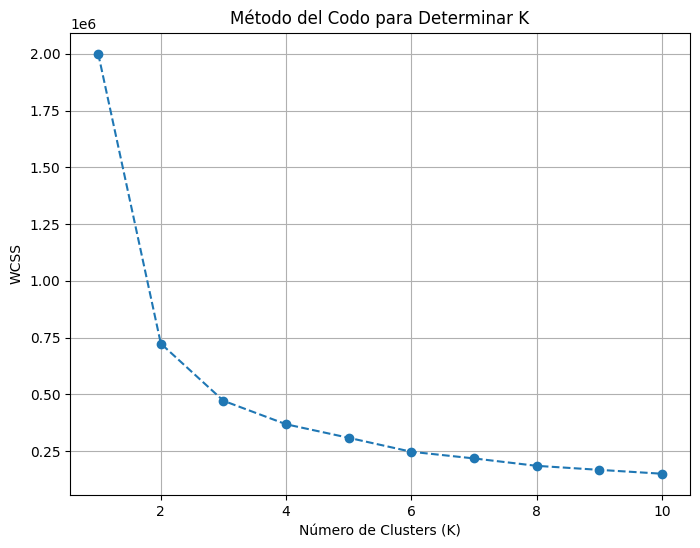

In [ ]:
# Método del codo
wcss = []  # Lista para guardar la WCSS para diferentes valores de K

# Probar diferentes valores de K (por ejemplo, de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Agregar la WCSS (inertia) al listado

# Graficar el Método del Codo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Cambios en el WCSS

In [ ]:
wcss

[1999999.9999999295,
 723783.0466189996,
 471918.3468856503,
 368562.3529812432,
 308975.398522404,
 247490.6687546115,
 218195.36726892265,
 185618.87453507783,
 167861.49233514472,
 150826.07701961554]

Grafica K-Means - Prueba

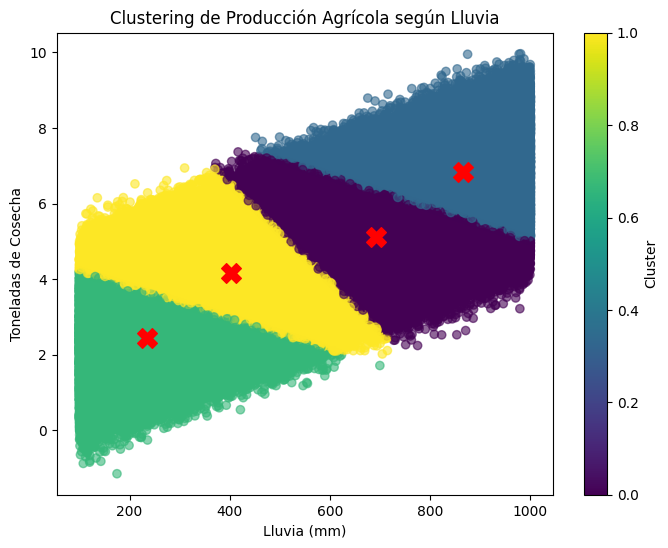

In [ ]:
# Aplicar K-Means con n clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Graficar los resultados
plt.figure(figsize=(8,6))
plt.scatter(data['Rainfall_mm'], data['Yield_tons_per_hectare'], c=data['Cluster'], cmap='viridis', alpha=0.6)

# Dibujar los centroides de los clusters
centroids = kmeans.cluster_centers_  # Obtener los centroides
centroids = scaler.inverse_transform(centroids)  # Deshacer la estandarización para los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroides')

plt.xlabel("Lluvia (mm)")
plt.ylabel("Toneladas de Cosecha")
plt.title("Clustering de Producción Agrícola según Lluvia")
plt.colorbar(label="Cluster")
plt.show()

**Uso de K-Means con PCA**

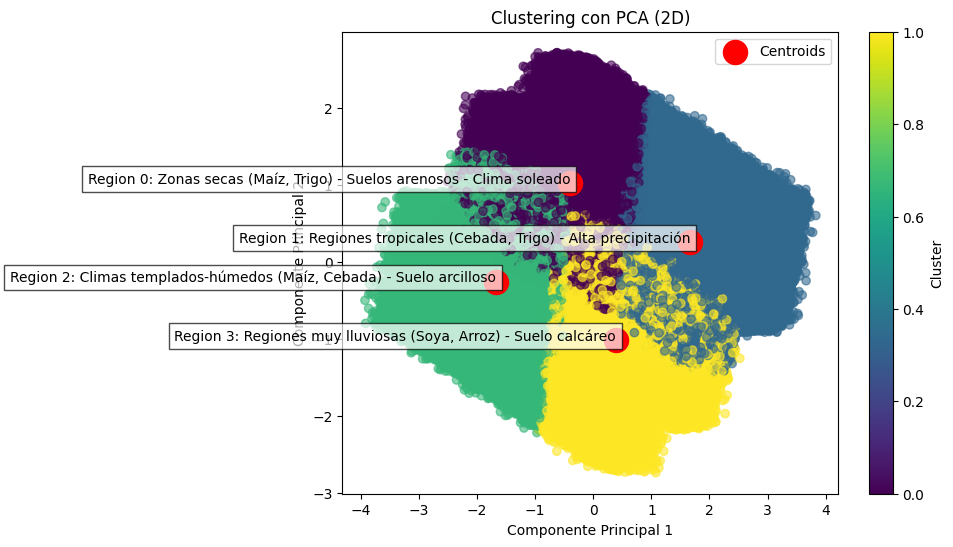

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/X Curso Samsung/crop_yield.csv', header='infer')

# Separar variables numéricas y categóricas
num_features = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare']
cat_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Aplicar transformación: escalar numéricas y codificar categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),  # Estandarizar datos numericos
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  # One-Hot Encoding a datos categóricos
])

X_processed = preprocessor.fit_transform(data)

# Reducir la dimensionalidad con PCA a 2D para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Aplicar K-Means en los datos transformados
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_processed)

# Asignar etiquetas a cada region:
cluster_labels = {
    0: "Region 0: Zonas secas (Maíz, Trigo) - Suelos arenosos - Clima soleado",
    1: "Region 1: Regiones tropicales (Cebada, Trigo) - Alta precipitación",
    2: "Region 2: Climas templados-húmedos (Maíz, Cebada) - Suelo arcilloso",
    3: "Region 3: Regiones muy lluviosas (Soya, Arroz) - Suelo calcáreo"
}

# Graficar los clusters en el espacio PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)

# Dibujar los centroides en el espacio PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids')

# Añadir etiquetas a los centroides
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, cluster_labels[i], fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering con PCA (2D)")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()

Analizamos las características de nuestros datos categoricos por región

In [ ]:
for feature in cat_features:
    print(data.groupby('Cluster')[feature].value_counts())

Cluster  Region
0        South     62459
         West      62435
         East      62245
         North     62241
1        North     62693
         South     62676
         West      62657
         East      62534
2        South     62513
         East      62481
         West      62333
         North     62215
3        North     63024
         West      62649
         East      62439
         South     62406
Name: count, dtype: int64
Cluster  Soil_Type
0        Loam         41919
         Sandy        41917
         Silt         41753
         Chalky       41452
         Clay         41415
         Peaty        40924
1        Peaty        42028
         Loam         41827
         Chalky       41786
         Silt         41761
         Sandy        41723
         Clay         41435
2        Clay         41880
         Sandy        41671
         Silt         41540
         Peaty        41529
         Chalky       41503
         Loam         41419
3        Chalky       42038
       

**Método del Codo para determinar el mejor k**

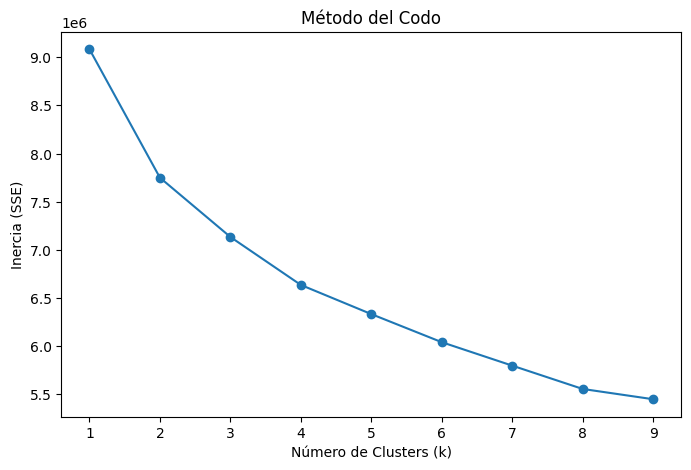

In [ ]:
# Probamos los diferentes valores de k
inercia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)  # Datos preprocesados
    inercia.append(kmeans.inertia_)  # Guardamos la inercia

# Graficamos el método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inercia, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo")
plt.show()

Distribución de la precipitación por Cluster

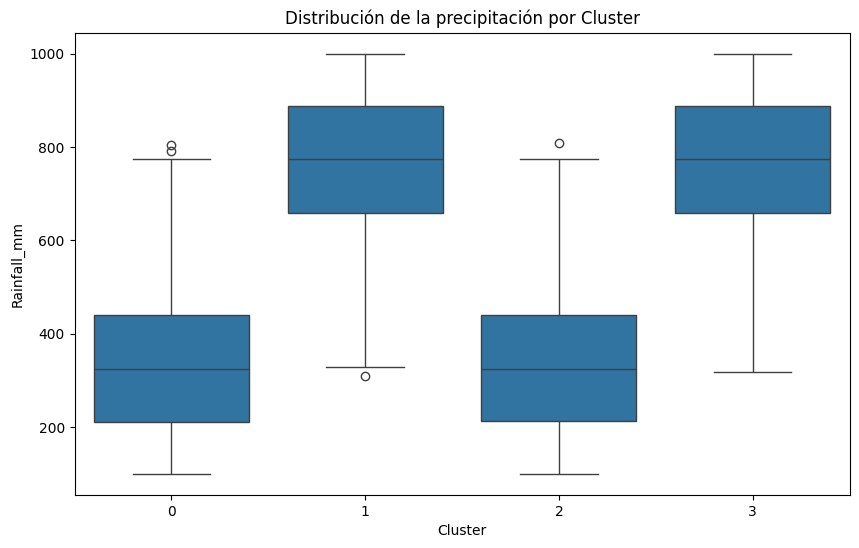

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Rainfall_mm', data=data)
plt.title("Distribución de la precipitación por Cluster")
plt.show()

**Calcular Silhouette Score**

El Silhouette Score mide que tan bien separado está cada punto de los otros clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score para el modelo actual (k=4)
silhouette_avg = silhouette_score(X_processed, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1137


**Calcular el Índice de Davies-Bouldin**

Este índice evalúa la compacidad y separación de los clusters.

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_processed, data['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.4f}")

Davies-Bouldin Index: 2.3433


Intento de implementar el metodo DBSCAN (NO resultó) :(

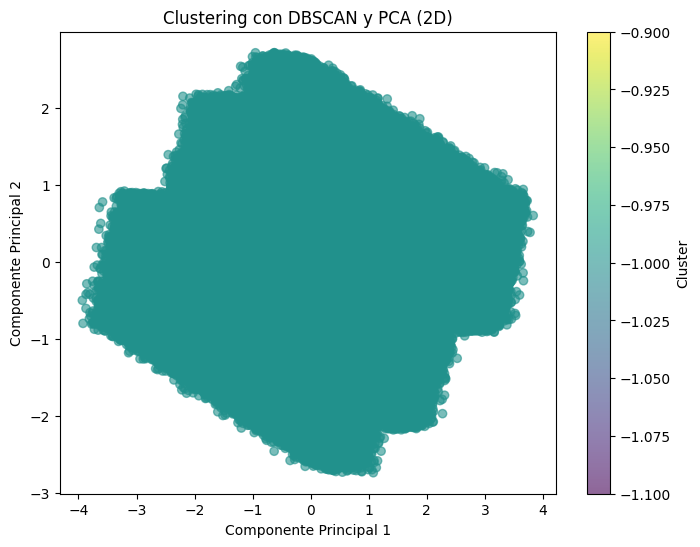

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.compose import ColumnTransformer

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/X Curso Samsung/crop_yield.csv', header='infer')

# Separar variables numéricas y categóricas
num_features = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare']
cat_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Aplicar transformación: escalar numéricas y codificar categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),  # Estandarizar numéricas
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  # One-Hot Encoding a categóricas
])

X_processed = preprocessor.fit_transform(data)

# Reducir la dimensionalidad con PCA a 2D para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)  # Puedes ajustar eps y min_samples
data['Cluster'] = dbscan.fit_predict(X_processed)

# Graficar los clusters en el espacio PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering con DBSCAN y PCA (2D)")
plt.colorbar(label="Cluster")
plt.show()
